In [33]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import time

import pandas as pd
from pyswarm import pso
from geneticalgorithm import geneticalgorithm as ga
from bees_algorithm import BeesAlgorithm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from geneticalgorithm import geneticalgorithm as ga
from sklearn.metrics import f1_score

In [14]:
def newton_optimization(func, initial_guess, jac):
    result = minimize(func, initial_guess, method='Newton-CG', jac=jac)
    return result.fun

def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100):
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
    return result[1]

#Функция Розенброка
def f(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

def jacobian(x):
    df_dx0 = -400 * x[0] * (-x[0]**2 + x[1]) + 2*x[0] - 2
    df_dx1 = -200 * x[0]**2 + 200 * x[1]
    return np.array([df_dx0, df_dx1])

def ga_optimization(func, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters):
    start_time = time.time()
    model = ga(function=func, dimension=dimension, variable_type_mixed=variable_type_mixed,
               variable_boundaries=variable_boundaries, algorithm_parameters=algorithm_parameters)
    model.run()
    end_time = time.time()
    return model.best_function, end_time - start_time

In [15]:
lb = [-25, 1]
ub = [25, 2]
swarmsize = 30
maxiter = 100
tolerance = 1e-6

In [20]:
newton_results = []
pso_results = []

for _ in range(100):
    initial_guess = np.array([np.random.uniform(-25, 25), np.random.uniform(1, 2)])
    newton_result = newton_optimization(f, initial_guess, jacobian)
    pso_result = pso_optimization(f, lb, ub, swarmsize, maxiter)

    newton_results.append(newton_result)
    pso_results.append(pso_result)

newton_mean = np.mean(newton_results)
newton_variance = np.var(newton_results)

pso_mean = np.mean(pso_results)
pso_variance = np.var(pso_results)

print(f"Newton Algorithm - Mean: {newton_mean}, Variance: {newton_variance}")
print(f"PSO Algorithm - Mean: {pso_mean}, Variance: {pso_variance}")

Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective chan

In [21]:
def newton_cg_optimization(func, jac, initial_guess, tolerance=1e-6):
    start_time = time.time()
    result = minimize(func, initial_guess, method='Newton-CG', jac=jac, tol=tolerance)
    end_time = time.time()
    return result.fun, end_time - start_time

def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100, tolerance=1e-6):
    start_time = time.time()
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter, minfunc=tolerance)
    end_time = time.time()
    return result[1], end_time - start_time

newton_cg_times = []
pso_times = []

for _ in range(100):
    initial_guess = np.array([0, 0])
    newton_cg_result, newton_cg_time = newton_cg_optimization(f, jacobian, initial_guess, tolerance)
    pso_result, pso_time = pso_optimization(f, lb, ub, swarmsize, maxiter, tolerance)

    newton_cg_times.append(newton_cg_time)
    pso_times.append(pso_time)

newton_cg_mean_time = np.mean(newton_cg_times)
pso_mean_time = np.mean(pso_times)

print(f"Newton-CG Algorithm - Mean Time: {newton_cg_mean_time} seconds")
print(f"PSO Algorithm - Mean Time: {pso_mean_time} seconds")


Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm best objective change less than 1e-06
Stopping search: Swarm b

In [22]:
def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100):
    start_time = time.time()
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter, minfunc=0, minstep=0)
    end_time = time.time()
    return result[1], end_time - start_time

pso_times = []
pso_values = []

for _ in range(100):
    pso_result, pso_time = pso_optimization(f, lb, ub, swarmsize, maxiter)

    pso_times.append(pso_time)
    pso_values.append(pso_result)

pso_mean_time = np.mean(pso_times)
pso_variance_time = np.var(pso_times)

pso_mean_value = np.mean(pso_values)
pso_variance_value = np.var(pso_values)

print(f"PSO Algorithm - Mean Time: {pso_mean_time} seconds, Variance Time: {pso_variance_time}")
print(f"PSO Algorithm - Mean Value: {pso_mean_value}, Variance Value: {pso_variance_value}")


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping sea

In [ ]:
dimension = 2
variable_type_mixed = np.array(['real', 'real'])
variable_boundaries = np.array([[-25, 25], [1, 2]])
algorithm_parameters = {'max_num_iteration': 100, 
                        'population_size': 30, 
                        'mutation_probability': 0.1, 
                        'elit_ratio': 0.1, 
                        'crossover_probability': 0.7, 
                        'parents_portion': 0.3, 
                        'crossover_type': 'uniform', 
                        'max_iteration_without_improv': None}

ga_times = []
ga_values = []

for _ in range(100):
    ga_result, ga_time = ga_optimization(f, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters)

    ga_times.append(ga_time)
    ga_values.append(ga_result)

ga_mean_time = np.mean(ga_times)
ga_variance_time = np.var(ga_times)

ga_mean_value = np.mean(ga_values)
ga_variance_value = np.var(ga_values)

print(f"GA Algorithm - Mean Time: {ga_mean_time} seconds, Variance Time: {ga_variance_time}")
print(f"GA Algorithm - Mean Value: {ga_mean_value}, Variance Value: {ga_variance_value}")


In [27]:
def f(x):
    return -((1-x[0])**2 + 100*(x[1] - x[0]**2)**2)

def bees_optimization(func, lb, ub, max_iter=100, num_bees=30):
    start_time = time.time()
    optimizer = BeesAlgorithm(func, lb, ub)
    optimizer.performFullOptimisation(max_iter)
    end_time = time.time()
    best = optimizer.best_solution
    return best.score, end_time - start_time

max_iter = 100
num_bees = 30

bees_times = []
bees_values = []

for _ in range(100):
    bees_result, bees_time = bees_optimization(f, lb, ub, max_iter, num_bees)

    bees_times.append(bees_time)
    bees_values.append(bees_result)

bees_mean_time = np.mean(bees_times)
bees_variance_time = np.var(bees_times)

bees_mean_value = np.mean(bees_values)
bees_variance_value = np.var(bees_values)

print(f"Bees Algorithm - Mean Time: {bees_mean_time} seconds, Variance Time: {bees_variance_time}")
print(f"Bees Algorithm - Mean Value: {bees_mean_value}, Variance Value: {bees_variance_value}")


Bees Algorithm - Mean Time: 0.0347903561592102 seconds, Variance Time: 1.5586111658819846e-06
Bees Algorithm - Mean Value: -0.0038993728206063475, Variance Value: 5.246049358479765e-05


In [31]:
def de_optimization(func, bounds, maxiter=100, strategy='best1bin', mutation=(0.5, 1), recombination=0.7, disp=False):
    start_time = time.time()
    result = differential_evolution(func, bounds, strategy=strategy, maxiter=maxiter, mutation=mutation, recombination=recombination, disp=disp)
    end_time = time.time()
    return result.fun, end_time - start_time

def f(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

bounds = [(-25, 25), (1, 2)]
maxiter = 100
strategy = 'best1bin'
mutation = (0.5, 1)
recombination = 0.7
disp = False

de_times = []
de_values = []

for _ in range(100):
    de_result, de_time = de_optimization(f, bounds, maxiter, strategy, mutation, recombination, disp)

    de_times.append(de_time)
    de_values.append(de_result)

de_mean_time = np.mean(de_times)
de_variance_time = np.var(de_times)

de_mean_value = np.mean(de_values)
de_variance_value = np.var(de_values)

print(f"DE Algorithm - Mean Time: {de_mean_time} seconds, Variance Time: {de_variance_time}")
print(f"DE Algorithm - Mean Value: {de_mean_value}, Variance Value: {de_variance_value}")


DE Algorithm - Mean Time: 0.07933075428009033 seconds, Variance Time: 0.00022779463031554314
DE Algorithm - Mean Value: 0.23939848863818422, Variance Value: 0.8978823030085333


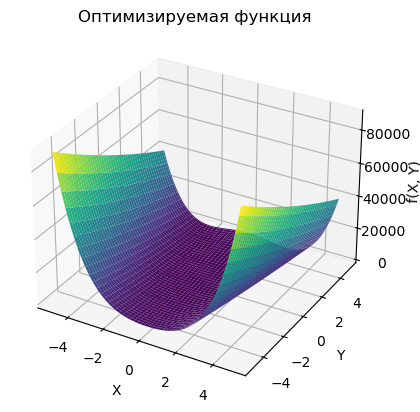

In [36]:
def f(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y - X**2)**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Оптимизируемая функция')
plt.show()


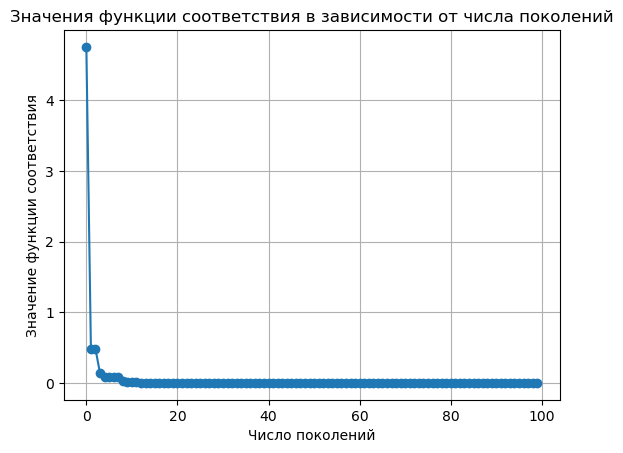

In [38]:
# Реализация алгоритма дифференциальной эволюции с сохранением значений функции соответствия
def de_optimization(func, bounds, maxiter=100, strategy='best1bin', mutation=(0.5, 1), recombination=0.7, disp=False):
    result = differential_evolution(func, bounds, strategy=strategy, maxiter=maxiter, mutation=mutation, recombination=recombination, disp=disp, callback=callback)
    return result.fun

# Callback функция для сохранения значений функции соответствия на каждом поколении
generation_values = []

def callback(xk, convergence):
    generation_values.append(f(xk))

# Параметры для алгоритма дифференциальной эволюции
bounds = [(-25, 25), (1, 2)]
maxiter = 100
strategy = 'best1bin'
mutation = (0.5, 1)
recombination = 0.7
disp = False

# Выполнение оптимизации
de_optimization(f, bounds, maxiter, strategy, mutation, recombination, disp)

# Визуализация значений функции соответствия в зависимости от числа поколений
plt.figure()
plt.plot(range(len(generation_values)), generation_values, marker='o')
plt.xlabel('Число поколений')
plt.ylabel('Значение функции соответствия')
plt.title('Значения функции соответствия в зависимости от числа поколений')
plt.grid(True)
plt.show()


 The best solution found:                                                                           
 [-1.36189143  1.8493691 ]

 Objective function:
 5.58142470739759


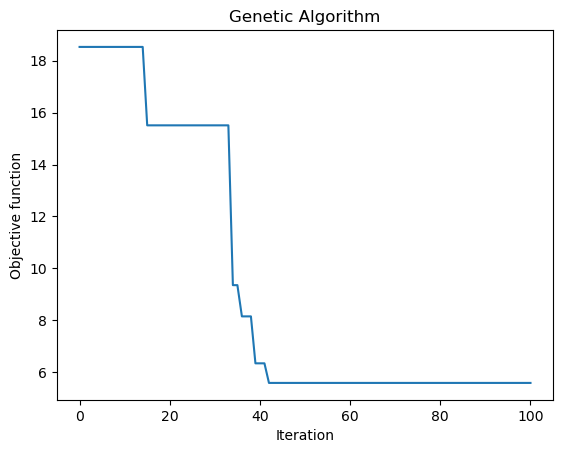

In [39]:
def ga_optimization(func, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters):
    model = ga(function=func, dimension=dimension, variable_type_mixed=variable_type_mixed,
               variable_boundaries=variable_boundaries, algorithm_parameters=algorithm_parameters)
    model.run()
    return model.report

dimension = 2
variable_type_mixed = np.array(['real', 'real'])
variable_boundaries = np.array([(-25, 25), (1, 2)])
algorithm_parameters = {'max_num_iteration': 100, 'population_size': 30, 'mutation_probability': 0.1, 'elit_ratio': 0.01,
                        'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform',
                        'max_iteration_without_improv': None}

generation_values = []

def callback(ga_instance):
    generation_values.append(ga_instance.best_function)

report = ga_optimization(f, dimension, variable_type_mixed, variable_boundaries, algorithm_parameters)


Stopping search: maximum iterations reached --> 0
Stopping search: maximum iterations reached --> 1
Stopping search: maximum iterations reached --> 2
Stopping search: maximum iterations reached --> 3
Stopping search: maximum iterations reached --> 4
Stopping search: maximum iterations reached --> 5
Stopping search: maximum iterations reached --> 6
Stopping search: maximum iterations reached --> 7
Stopping search: maximum iterations reached --> 8
Stopping search: maximum iterations reached --> 9
Stopping search: maximum iterations reached --> 10
Stopping search: maximum iterations reached --> 11
Stopping search: maximum iterations reached --> 12
Stopping search: maximum iterations reached --> 13
Stopping search: maximum iterations reached --> 14
Stopping search: maximum iterations reached --> 15
Stopping search: maximum iterations reached --> 16
Stopping search: maximum iterations reached --> 17
Stopping search: maximum iterations reached --> 18
Stopping search: maximum iterations reach

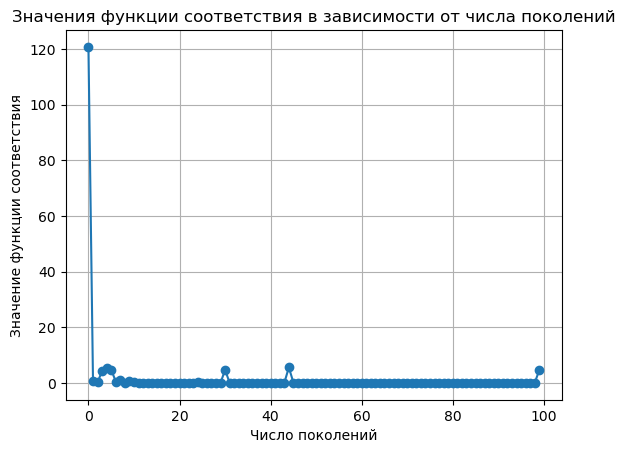

In [40]:
def pso_optimization(func, lb, ub, swarmsize=30, maxiter=100):
    result = pso(func, lb, ub, swarmsize=swarmsize, maxiter=maxiter)
    return result
swarmsize = 30
maxiter = 100


generation_values = []
for i in range(100):
    pso_result = pso_optimization(f, lb, ub, swarmsize, i)
    generation_values.append(f(pso_result[0]))

plt.figure()
plt.plot(range(len(generation_values)), generation_values, marker='o')
plt.xlabel('Число поколений')
plt.ylabel('Значение функции соответствия')
plt.title('Значения функции соответствия в зависимости от числа поколений')
plt.grid(True)
plt.show()

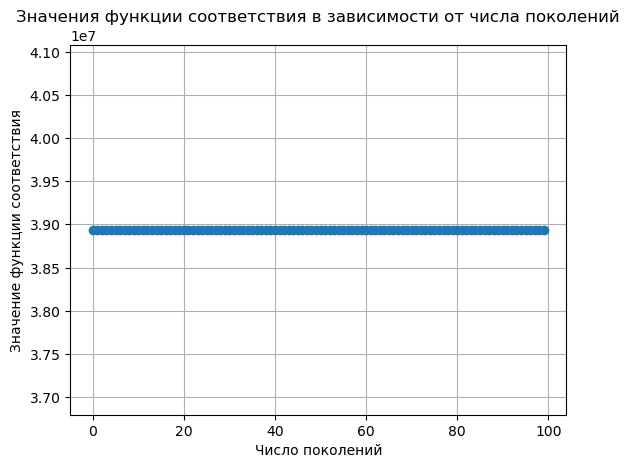

In [41]:

def f(x):
    return -(1-x[0])**2 + 100*(x[1] - x[0]**2)**2

def f_true(x):
    return (1-x[0])**2 + 100*(x[1] - x[0]**2)**2

def bees_optimization(func, lb, ub, max_iter=100, num_bees=30):

    optimizer = BeesAlgorithm(func, lb, ub)
    optimizer.performFullOptimisation(max_iter)

    best = optimizer.best_solution
    return best.values

max_iter = 100
num_bees = 30

generation_values = []

for _ in range(100):
    bees_result = bees_optimization(f, lb, ub, i, num_bees)

    generation_values.append(f(bees_result))

plt.figure()
plt.plot(range(len(generation_values)), generation_values, marker='o')
plt.xlabel('Число поколений')
plt.ylabel('Значение функции соответствия')
plt.title('Значения функции соответствия в зависимости от числа поколений')
plt.grid(True)
plt.show()


In [42]:
df = pd.DataFrame({
    'alg': ['Newton', 'Gen', 'PSO', 'Bees', 'Diff'],
    'mean_time': [newton_cg_mean_time, ga_mean_time, pso_mean_time, bees_mean_time, de_mean_time],
    'var_time': [newton_variance, ga_variance_time, pso_variance, bees_variance_time, de_variance_time],
    'mean_value': [newton_mean, ga_mean_value, pso_mean_value, bees_mean_value, de_mean_value],
    'var_value': [newton_variance, ga_variance_value, pso_variance, bees_variance_value, de_variance_value]
})

In [43]:
df

,alg,mean_time,var_time,mean_value,var_value
0,Newton,0.002551,0.745004,0.164059,0.745004
1,Gen,0.380832,0.000363,1.106440,6.769400
2,PSO,0.036353,0.001398,0.085191,0.001398
3,Bees,0.034790,0.000002,-0.003899,0.000052
4,Diff,0.079331,0.000228,0.239398,0.897882


 The best solution found:                                                                           
 [7.19693771e+01 5.26927600e-02]

 Objective function:
 -0.9833333333333333


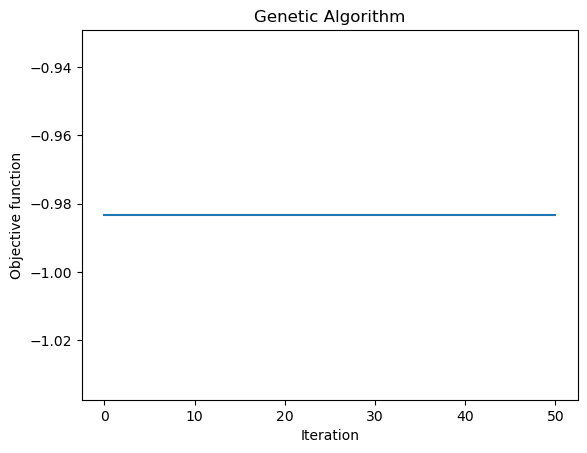

 The best solution found:                                                                           
 [1.]

 Objective function:
 -0.9666666666666667


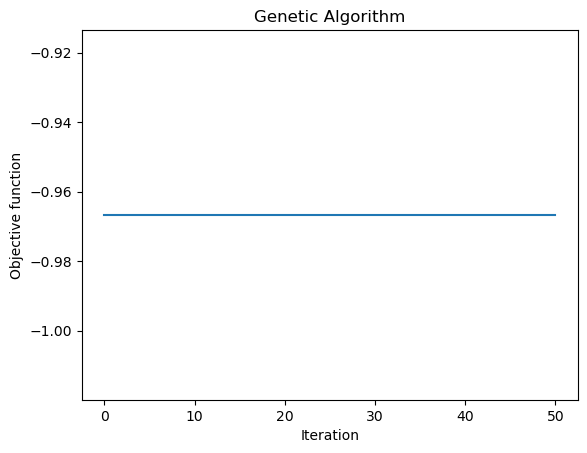

 The best solution found:                                                                           
 [150.  20.]

 Objective function:
 -0.9666666666666667


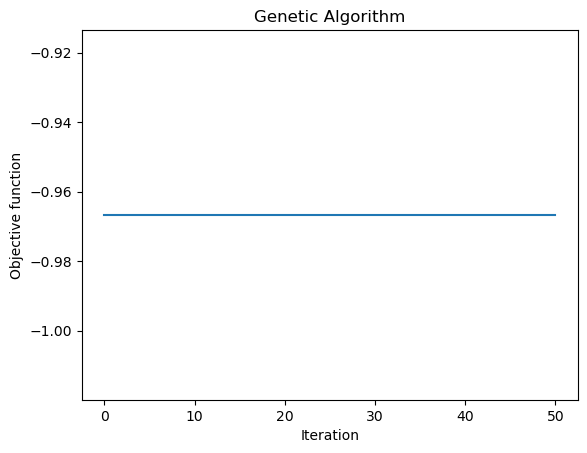

Оптимальные параметры для SVM: C=71.96937708946788, gamma=0.05269276002902894
Оптимальные параметры для KNN: n_neighbors=1
Оптимальные параметры для RF: n_estimators=150, max_depth=20


In [44]:

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение целевой функции для SVM
def svm_objective(params):
    C, gamma = params
    model = SVC(C=C, gamma=gamma, kernel='rbf')
    model.fit(X_test, y_test)
    y_preds = model.predict(X_train)
    scores = f1_score(y_train, y_preds, average='weighted')
    return -scores  # Минимизируем отрицательную точность

# Определение целевой функции для KNN
def knn_objective(params):
    n_neighbors, = params
    model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
    model.fit(X_test, y_test)
    y_preds = model.predict(X_train)
    scores = f1_score(y_train, y_preds, average='weighted')
    return -scores  # Минимизируем отрицательную точность

# Определение целевой функции для RF
def rf_objective(params):
    n_estimators, max_depth = params
    model = RandomForestClassifier(n_estimators=int(n_estimators), max_depth=int(max_depth))
    model.fit(X_test, y_test)
    y_preds = model.predict(X_train)
    scores = f1_score(y_train, y_preds, average='weighted')
    return -scores  # Минимизируем отрицательную точность

# Параметры для генетического алгоритма
algorithm_parameters = {
    'max_num_iteration': 50,
    'population_size': 30,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': None
}

# Оптимизация параметров для SVM
svm_variable_boundaries = np.array([[0.1, 100], [0.001, 1]])
svm_model = ga(function=svm_objective, dimension=2, variable_type_mixed=np.array(['real', 'real']),
               variable_boundaries=svm_variable_boundaries, algorithm_parameters=algorithm_parameters)
svm_model.run()
svm_best_params = svm_model.best_variable

# Оптимизация параметров для KNN
knn_variable_boundaries = np.array([[1, 20]])
knn_model = ga(function=knn_objective, dimension=1, variable_type_mixed=np.array(['int']),
               variable_boundaries=knn_variable_boundaries, algorithm_parameters=algorithm_parameters)
knn_model.run()
knn_best_params = knn_model.best_variable

# Оптимизация параметров для RF
rf_variable_boundaries = np.array([[10, 200], [1, 50]])
rf_model = ga(function=rf_objective, dimension=2, variable_type_mixed=np.array(['int', 'int']),
              variable_boundaries=rf_variable_boundaries, algorithm_parameters=algorithm_parameters)
rf_model.run()
rf_best_params = rf_model.best_variable

# Вывод оптимальных параметров
print(f"Оптимальные параметры для SVM: C={svm_best_params[0]}, gamma={svm_best_params[1]}")
print(f"Оптимальные параметры для KNN: n_neighbors={int(knn_best_params[0])}")
print(f"Оптимальные параметры для RF: n_estimators={int(rf_best_params[0])}, max_depth={int(rf_best_params[1])}")
